In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from graph_tool.all import *

In [21]:
ad_genes = "APP,HFE,MPO,NOS3,PLAU,ABCA7,PSEN2,PSEN1,APOE"
schizo_genes = "APOL2,APOL4,CHI3L1,COMT,DAOA,DISC2,DRD3,HTR2A,MTHFR,RTN4R,SYN2,SHANK3,DISC1,RBM12,NRXN1,SLC1A1,PRODH,NRG1"

ad_dict = {
    # Alzheimer Disease
    "APP": "9606.ENSP00000284981",
    "HFE": "9606.ENSP00000417404",
    "MPO": "9606.ENSP00000225275",
    "NOS3": "9606.ENSP00000297494",
    "PLAU": "9606.ENSP00000361850",
}

ad_related_dict = {
    # AD Related
    "ABCA7": "9606.ENSP00000263094",
    "PSEN1": "9606.ENSP00000326366",
    "PSEN2": "9606.ENSP00000355747",
    "APOE": "9606.ENSP00000252486",
}

ad_full = ad_dict | ad_related_dict

schiz_dict = {
    # Schizophrenia
    "APOL2": "9606.ENSP00000249066",
    "APOL4": "9606.ENSP00000338260",
    "CHI3L1": "9606.ENSP00000255409",
    "COMT": "9606.ENSP00000354511",
    "DAOA": "9606.ENSP00000483757",
    "DISC1": "9606.ENSP00000355593",
    "DRD3": "9606.ENSP00000373169",
    "HTR2A": "9606.ENSP00000437737",
    "MTHFR": "9606.ENSP00000365777",
    "RTN4R": "9606.ENSP00000043402",
    "SYN2": "9606.ENSP00000480050",
}

schiz_related_dict = {
    # Schizophrenia Related
    "RBM12": "9606.ENSP00000363228",
    "NRXN1": "9606.ENSP00000385142",
    "SLC1A1": "9606.ENSP00000262352",
    "PRODH": "9606.ENSP00000481127",
    "NRG1": "9606.ENSP00000384620",
}

schiz_full = schiz_dict | schiz_related_dict

    
relevant_schiz_genes = ["APOL2", "APOL4", "CHI3L1", "COMT", "DAOA", "DISC1", "DRD3", "HTR2A", "MTHFR", "RTN4R", "SYN2"]
relevant_ad_genes = ["APP", "HFE", "MPO", "NOS3", "PLAU"]

relevant_genes = relevant_schiz_genes + relevant_ad_genes

In [8]:
g = load_graph("all_protein_combined.graphml")
print(g)

<Graph object, undirected, with 19382 vertices and 5968680 edges, 1 internal vertex property, 4 internal edge properties, at 0x7f08194cbdc0>


In [9]:
df_ad = pd.read_csv('ad_network_full_with_labels.csv', sep=",")
df_schiz = pd.read_csv('schiz_network_full_with_labels.csv', sep=",")

In [10]:
Graphtype = nx.Graph()
ad_graph = nx.from_pandas_edgelist(df_ad, source="Source", target="Target",
                            create_using=Graphtype, edge_attr=True)

In [11]:
Graphtype = nx.Graph()
schiz_graph = nx.from_pandas_edgelist(df_schiz, source="Source", target="Target",
                            create_using=Graphtype, edge_attr=True)

In [12]:
ad_betweenness = nx.betweenness_centrality(ad_graph)
schiz_betweenness = nx.betweenness_centrality(schiz_graph)

In [16]:
# Centrality
vp_betweenness, ep_betweenness = graph_tool.centrality.betweenness(g)
print(f"vertex p betweenness = {vp_betweenness}")
print(f"edge p betweenness = {ep_betweenness}")

vp_closness = graph_tool.centrality.closeness(g)
print(f"vertex p closeness = {vp_closness}")

# Clustering
local_clustering = graph_tool.clustering.local_clustering(g)
print(graph_tool.stats.vertex_average(g, local_clustering))
global_clustering = graph_tool.clustering.global_clustering(g)
print(global_clustering)

vertex p betweenness = <VertexPropertyMap object with value type 'double', for Graph 0x7f08194cbdc0, at 0x7f08194d5760>
edge p betweenness = <EdgePropertyMap object with value type 'double', for Graph 0x7f08194cbdc0, at 0x7f08194d5130>
vertex p closeness = <VertexPropertyMap object with value type 'double', for Graph 0x7f08194cbdc0, at 0x7f081a3f1a90>
(0.1952338728921458, 0.0006214113968411895)
(0.19299713533367516, 0.0010956810919999344)


In [17]:
schiz_res = {}
ad_res = {}

# print(g.list_properties())
prop = g.vertex_properties["_graphml_vertex_id"]

for key, value in schiz_dict.items():
    schiz_vertex = graph_tool.util.find_vertex(g, prop, key)[0]
    print(f"Schiz: found vertex for {key} - {schiz_vertex}")
    schiz_res[key] = schiz_vertex


for key, value in ad_dict.items():
    ad_vertex = graph_tool.util.find_vertex(g, prop, key)[0]
    print(f"AD: found vertex for {key} - {ad_vertex}")
    ad_res[key] = ad_vertex

Schiz: found vertex for APOL2 - 13385
Schiz: found vertex for APOL4 - 18099
Schiz: found vertex for CHI3L1 - 3394
Schiz: found vertex for COMT - 1486
Schiz: found vertex for DAOA - 15629
Schiz: found vertex for DISC1 - 12924
Schiz: found vertex for DRD3 - 6981
Schiz: found vertex for HTR2A - 8935
Schiz: found vertex for MTHFR - 5774
Schiz: found vertex for RTN4R - 4843
Schiz: found vertex for SYN2 - 8892
AD: found vertex for APP - 1501
AD: found vertex for HFE - 1856
AD: found vertex for MPO - 5548
AD: found vertex for NOS3 - 5768
AD: found vertex for PLAU - 10331


In [18]:
# Print Stats from our Vertices

schiz_betweenness = {}
ad_betweenness = {}
schiz_closeness = {}
ad_closeness = {}
schiz_local_cluster = {}
ad_local_cluster = {}
schiz_degree = {}
ad_degree = {}

for key, value in schiz_res.items():
    schiz_betweenness[key] = vp_betweenness[value]
    schiz_closeness[key] = vp_closness[value]
    schiz_degree[key] = g.get_total_degrees([value])
    schiz_local_cluster[key] = local_clustering[value]
    

for key, value in ad_res.items():
    ad_betweenness[key] = vp_betweenness[value]
    ad_closeness[key] = vp_closness[value]
    ad_degree[key] = g.get_total_degrees([value])
    ad_local_cluster[key] = local_clustering[value]
    
    
np.average(ad_local_cluster)
print(f"betweenness whole graph: {np.average(vp_betweenness.a)}")
print(f"closeness whole graph: {np.average(vp_closness.a)}")
print(f"node degree average whole graph: {graph_tool.stats.vertex_average(g, 'total')}")

betweenness whole graph: 5.369104564006777e-05
closeness whole graph: 0.49165797352336726
node degree average whole graph: (615.8992879991745, 3.6760079012729885)


In [22]:
# degree
f_schiz_degree = {}
f_ad_degree = {}
# betweenness
f_schiz_betweenness_d = {}
f_ad_betweenness_d = {}
# closeness
f_schiz_closeness = {}
f_ad_closeness = {}
# local_cluster
f_schiz_cluster = {}
f_ad_cluster = {}

for n in relevant_ad_genes:
    f_ad_degree[n] = ad_graph.degree(n)
    f_ad_closeness[n] = nx.closeness_centrality(ad_graph, u=n)
    f_ad_cluster[n] = nx.clustering(ad_graph, nodes=n)
    f_ad_betweenness_d[n] = ad_betweenness[n] 
    
for n in relevant_schiz_genes:
    f_schiz_degree[n] = schiz_graph.degree(n)
    f_schiz_closeness[n] = nx.closeness_centrality(schiz_graph, u=n)
    f_schiz_cluster[n] = nx.clustering(schiz_graph, nodes=n)
    f_schiz_betweenness_d[n] = schiz_betweenness[n]
    

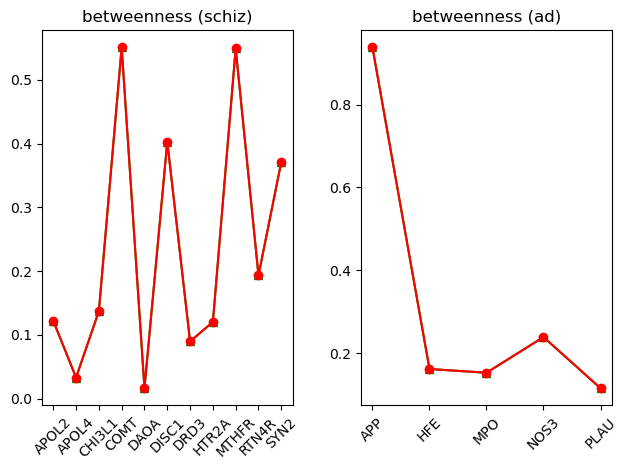

In [35]:
lists = schiz_betweenness.items()
f_lists = f_schiz_betweenness_d.items()
x1, y1 = zip(*lists)
x2, y2 = zip(*f_lists)

y1_norm = np.linalg.norm(y1)
y2_norm = np.linalg.norm(y2)

y1 = y1/y1_norm
y2 = y2/y2_norm

plt.subplot(1, 2, 1)
plt.xticks(rotation = 45)
plt.title("betweenness (schiz)")
plt.plot(x1, y1, 'g-^', x2, y2, 'r-o')
plt.subplots_adjust(left=.89)
plt.subplot(1, 2, 2)
lists = ad_betweenness.items()
f_lists = f_ad_betweenness_d.items()
x1, y1 = zip(*lists)
x2, y2 = zip(*f_lists)

y1_norm = np.linalg.norm(y1)
y2_norm = np.linalg.norm(y2)

y1 = y1/y1_norm
y2 = y2/y2_norm

plt.xticks(rotation = 45)
plt.title("betweenness (ad)")
plt.tight_layout()
plt.plot(x1, y1, 'g-^', x2, y2, 'r-o')

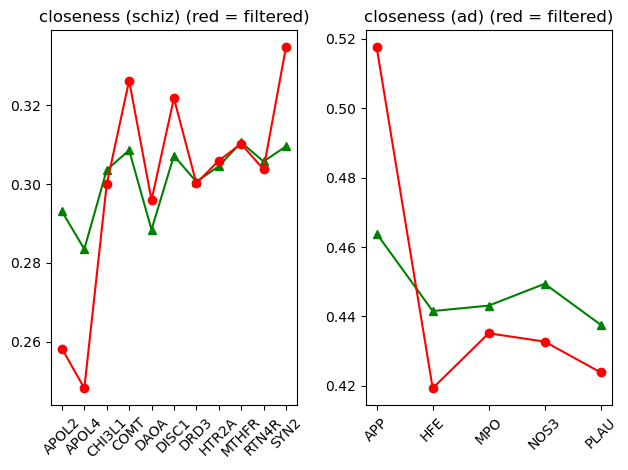

In [38]:
lists = schiz_closeness.items()
f_lists = f_schiz_closeness.items()
x1, y1 = zip(*lists)
x2, y2 = zip(*f_lists)

y1_norm = np.linalg.norm(y1)
y2_norm = np.linalg.norm(y2)

y1 = y1/y1_norm
y2 = y2/y2_norm

plt.subplot(1, 2, 1)
plt.xticks(rotation = 45)
plt.title("closeness (schiz) (red = filtered)")
plt.plot(x1, y1, 'g-^', x2, y2, 'r-o')
plt.subplots_adjust(left=.89)
plt.subplot(1, 2, 2)
lists = ad_closeness.items()
f_lists = f_ad_closeness.items()
x1, y1 = zip(*lists)
x2, y2 = zip(*f_lists)

y1_norm = np.linalg.norm(y1)
y2_norm = np.linalg.norm(y2)

y1 = y1/y1_norm
y2 = y2/y2_norm

plt.xticks(rotation = 45)
plt.title("closeness (ad) (red = filtered)")
plt.tight_layout()
plt.plot(x1, y1, 'g-^', x2, y2, 'r-o')

In [45]:
for v in local_clustering:
    print(v)

AttributeError: 'VertexPropertyMap' object has no attribute 'items'

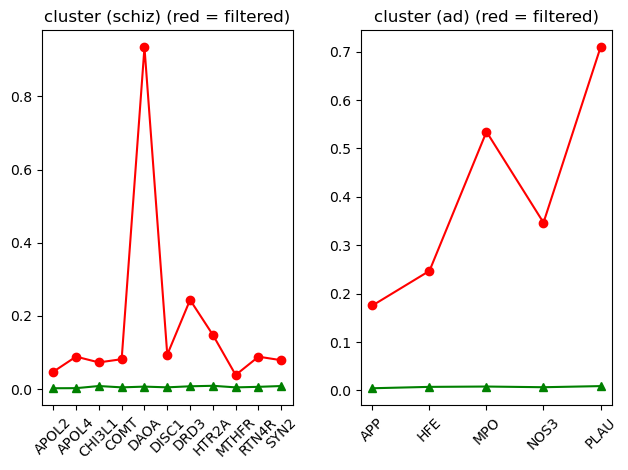

In [44]:
lists = schiz_local_cluster.items()
f_lists = f_schiz_cluster.items()
x1, y1 = zip(*lists)
x2, y2 = zip(*f_lists)

y1_norm = np.linalg.norm(y1)
y2_norm = np.linalg.norm(y2)

y1 = y1/y1_norm
y2 = y2/y2_norm

plt.subplot(1, 2, 1)
plt.xticks(rotation = 45)
plt.title("cluster (schiz) (red = filtered)")
plt.plot(x1, y1, 'g-^', x2, y2, 'r-o')
plt.subplots_adjust(left=.89)
plt.subplot(1, 2, 2)
lists = ad_local_cluster.items()
f_lists = f_ad_cluster.items()
x1, y1 = zip(*lists)
x2, y2 = zip(*f_lists)

y1_norm = np.linalg.norm(y1)
y2_norm = np.linalg.norm(y2)

y1 = y1/y1_norm
y2 = y2/y2_norm

plt.xticks(rotation = 45)
plt.title("cluster (ad) (red = filtered)")
plt.tight_layout()
plt.plot(x1, y1, 'g-^', x2, y2, 'r-o')

In [62]:
x = [*local_clustering]

#Schiz: found vertex for APOL2 - 13385
#Schiz: found vertex for APOL4 - 18099
#Schiz: found vertex for CHI3L1 - 3394
#Schiz: found vertex for COMT - 1486
#Schiz: found vertex for DAOA - 15629
#Schiz: found vertex for DISC1 - 12924
#Schiz: found vertex for DRD3 - 6981
#Schiz: found vertex for HTR2A - 8935
#Schiz: found vertex for MTHFR - 5774
#Schiz: found vertex for RTN4R - 4843
#Schiz: found vertex for SYN2 - 8892
#AD: found vertex for APP - 1501
#AD: found vertex for HFE - 1856
#AD: found vertex for MPO - 5548
#AD: found vertex for NOS3 - 5768
#AD: found vertex for PLAU - 10331
ids = ad_res.values() + schiz_res.values()
xticks = [*ids]
colors = []
for key in x: # keys are the names of the boys
    if key in schiz_res.values():
        colors.append('r')
    elif key in ad_res.values():
        colors.append('g')
    else:
        colors.append('b')

ind = np.arange(len(x))
fig = plt.figure()

ax = fig.add_subplot(111)

ax.bar(ind, x, 0.5, color=colors)
        
plt.xticks(xticks, rotation = 45)
plt.title("local_cluster whole graph")

plt.show()
#plt.plot(ind, x, color=colors)

TypeError: unsupported operand type(s) for +: 'dict_values' and 'dict_values'